# **LIBRARY**

In [ ]:
# Library untuk mengakses Google Drive dan mengakses direktori
from google.colab import drive
import os

# Library untuk membuka dan menyimpan citra
from PIL import Image

# Library untuk menampilkan hasil tiap tahapan pengolahan citra
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Library untuk preprocessing citra
import cv2
import numpy as np

# Library fitur GLCM
from skimage.feature import graycomatrix, graycoprops
import pandas as pd

# Library untu modeling citra
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

#Library untuk hyperparameter tuning gridsearchcv
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [ ]:
# Library untuk mengakses Google Drive dan mengakses direktori
from google.colab import drive
import os

# Akses ke Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**KONEKSI DRIVE**

In [ ]:
# Akses ke Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **MELABELKAN GAMBAR**



In [ ]:
cd '/content/drive/MyDrive/PPDM/PIR/APEL_BARU/'

/content/drive/MyDrive/PPDM/PIR/APEL_BARU


In [ ]:
# Path ke folder data
folder_path = '/content/drive/MyDrive/PPDM/PIR/APEL_BARU/'
# Daftar nama subfolder (busuk dan matang)
subfolders = ['busuk',  'matang']

# Inisialisasi list untuk citra dan label
cropped_images = []
labels = []

# Melabelkan Gambar
for subfolder in subfolders:
    subfolder_path = os.path.join(folder_path, subfolder)
    image_names = os.listdir(subfolder_path)
    for image_name in image_names:
        image_path = os.path.join(subfolder_path, image_name)
        cropped_image = Image.open(image_path)


        cropped_images.append(cropped_image)
        labels.append(subfolder)

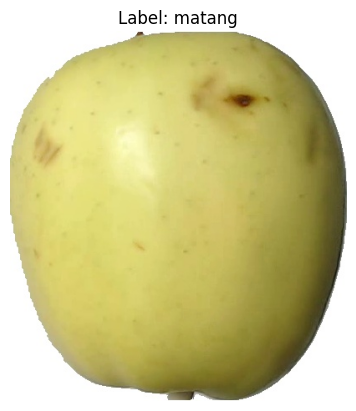

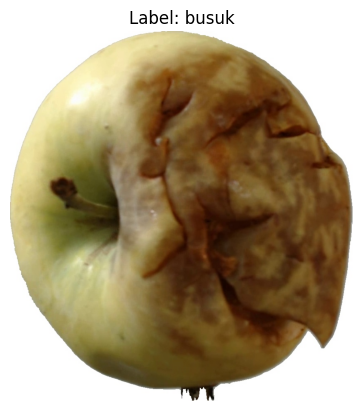

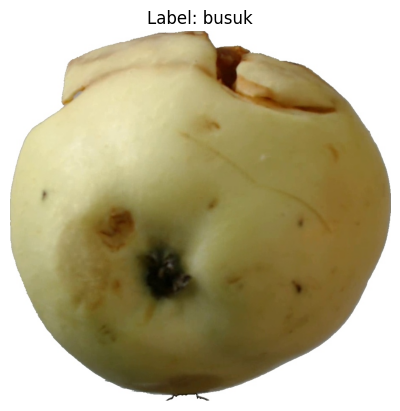

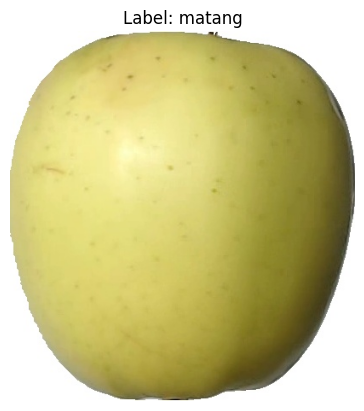

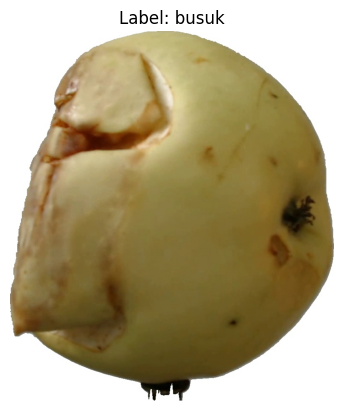

In [ ]:
# Library untuk menampilkan hasil tiap tahapan pengolahan citra
import matplotlib.pyplot as plt
import random

# Memilih beberapa citra secara acak
num_samples = 5
sample_indices = random.sample(range(len(cropped_images)), num_samples)

# Menampilkan citra beserta labelnya
for i in sample_indices:
    image = cropped_images[i]
    label = labels[i]

    # Menampilkan citra
    plt.figure()
    plt.imshow(image)
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

# **CROP GAMBAR**

In [ ]:
# Ukuran yang diinginkan
desired_size = (256, 256)

# Inisialisasi list untuk citra baru
resized_images = []

for image in cropped_images:
    # Mengubah citra sesuai ukuran yang diinginkan
    image = image.resize(desired_size)

    # Menambahkan citra yang telah diubah ukurannya ke list baru
    resized_images.append(image)

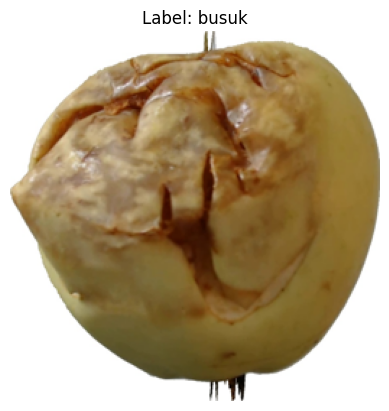

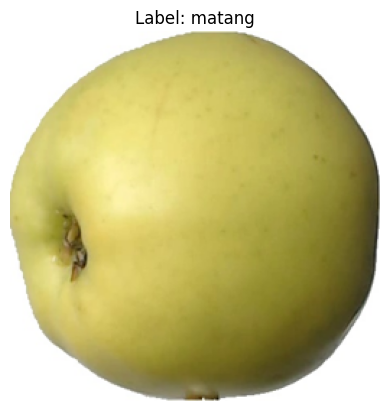

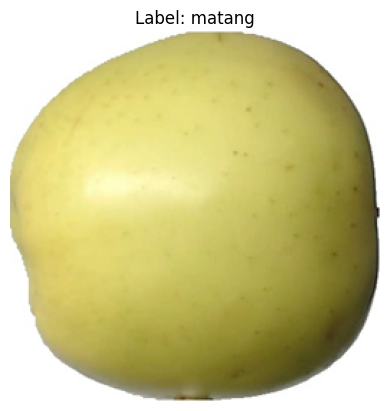

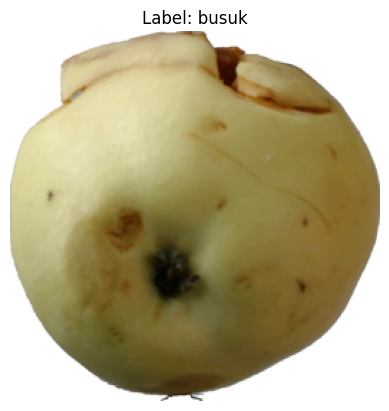

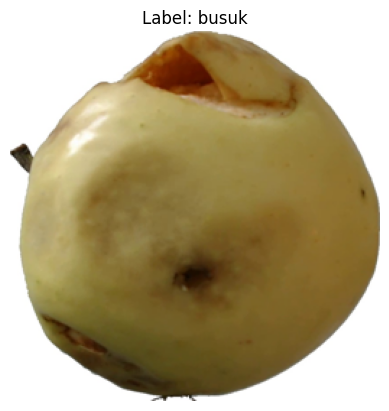

In [ ]:
# Memilih beberapa citra secara acak
num_samples = 5
sample_indices = random.sample(range(len(resized_images)), num_samples)

# Menampilkan citra beserta labelnya
for i in sample_indices:
    image = resized_images[i]
    label = labels[i]

    # Menampilkan citra
    plt.figure()
    plt.imshow(image)
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

# **GRAYSCALE GAMBAR**

In [ ]:
# Inisialisasi list untuk citra grayscale
grayscaled_images = []

for image in resized_images:
  # Ubah citra ke dalam format numpy array
  image_np = np.array(image)

  # Ubah citra RGB menjadi Grayscale
  grayscale_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)

  # Tambah citra ke dalam list baru
  grayscaled_images.append(Image.fromarray(grayscale_image))

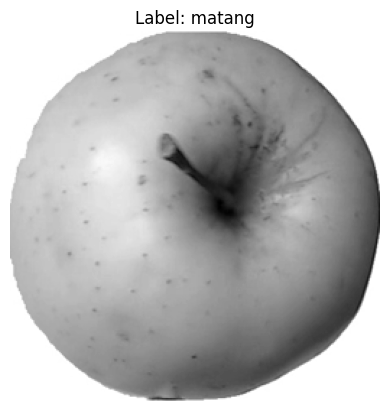

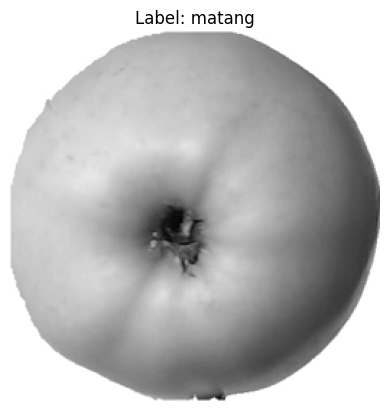

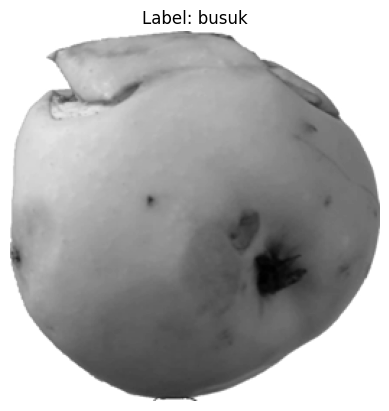

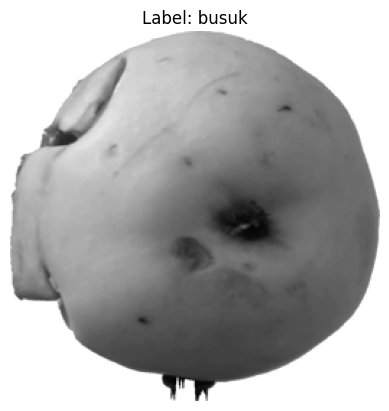

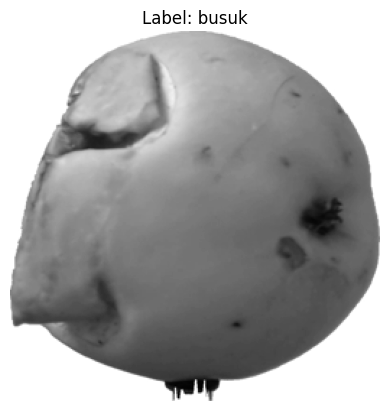

In [ ]:
# Memilih beberapa citra secara acak
num_samples = 5
sample_indices = random.sample(range(len(grayscaled_images)), num_samples)

# Menampilkan citra beserta labelnya
for i in sample_indices:
    image = grayscaled_images[i]
    label = labels[i]

    # Menampilkan citra
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()


# **EKSTRAKSI FITUR GLCM**

In [ ]:
import pandas as pd
import numpy as np
from skimage.feature import graycomatrix, graycoprops

# Daftar sudut
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

# Inisialisasi kolom fitur
columns = ['Contrast', 'Dissimilarity', 'Homogeneity', 'ASM', 'Energy', 'Correlation', 'Class']

# Inisialisasi list datasets yang menampung dataset yang dihasilkan dari ekstraksi fitur dari berbagai sudut
datasets = []

for angle in angles:
    # Inisialisasi dataset kosong yang digunakan untuk menampung hasil ekstraksi
    feature_data = []

    for image, label in zip(grayscaled_images, labels):
        # Ubah citra ke dalam format numpy array
        image_np = np.array(image)

        # Hitung GLCM dengan sudut tertentu
        glcm = graycomatrix(image_np, [1], [angle], symmetric=True, normed=True)

        # Ekstrak fitur dari GLCM
        contrast = graycoprops(glcm, 'contrast')[0, 0]
        dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
        homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
        asm = graycoprops(glcm, 'ASM')[0, 0]
        energy = graycoprops(glcm, 'energy')[0, 0]
        correlation = graycoprops(glcm, 'correlation')[0, 0]

        # Tambahkan fitur ke list feature_data
        feature_data.append({'Contrast': contrast,
                             'Dissimilarity': dissimilarity,
                             'Homogeneity': homogeneity,
                             'ASM': asm,
                             'Energy': energy,
                             'Correlation': correlation,
                             'Class': label})

    # Buat DataFrame dari list fitur
    feature_df = pd.DataFrame(feature_data, columns=columns)

    # Tambahkan DataFrame ke dalam list datasets
    datasets.append(feature_df)

dataset_glcm_0, dataset_glcm_45, dataset_glcm_90, dataset_glcm_135 = datasets

In [ ]:
print("Dataset Sudut 0:")
print(dataset_glcm_0.head())

print("Dataset Sudut 45:")
print(dataset_glcm_45.head())

print("Dataset Sudut 90:")
print(dataset_glcm_90.head())

print("Dataset Sudut 135:")
print(dataset_glcm_135.head())

Dataset Sudut 0:
     Contrast  Dissimilarity  Homogeneity       ASM    Energy  Correlation  \
0  118.729059       3.760953     0.542682  0.084156  0.290097     0.989165   
1   94.451333       3.655101     0.464464  0.064403  0.253778     0.992175   
2   99.712531       2.565043     0.635521  0.055814  0.236249     0.989058   
3   75.000980       2.381832     0.611573  0.063773  0.252533     0.991730   
4  120.119133       3.841590     0.533322  0.087872  0.296432     0.989407   

   Class  
0  busuk  
1  busuk  
2  busuk  
3  busuk  
4  busuk  
Dataset Sudut 45:
     Contrast  Dissimilarity  Homogeneity       ASM    Energy  Correlation  \
0  219.321015       5.462007     0.490149  0.081881  0.286148     0.979916   
1  155.834325       5.164983     0.406360  0.062543  0.250086     0.987045   
2  181.228005       3.922015     0.538964  0.053574  0.231461     0.980021   
3  123.981976       3.170104     0.549767  0.061670  0.248334     0.986276   
4  219.062299       5.550573     0.48274

# **MELIHAT KORELASI FITUR**

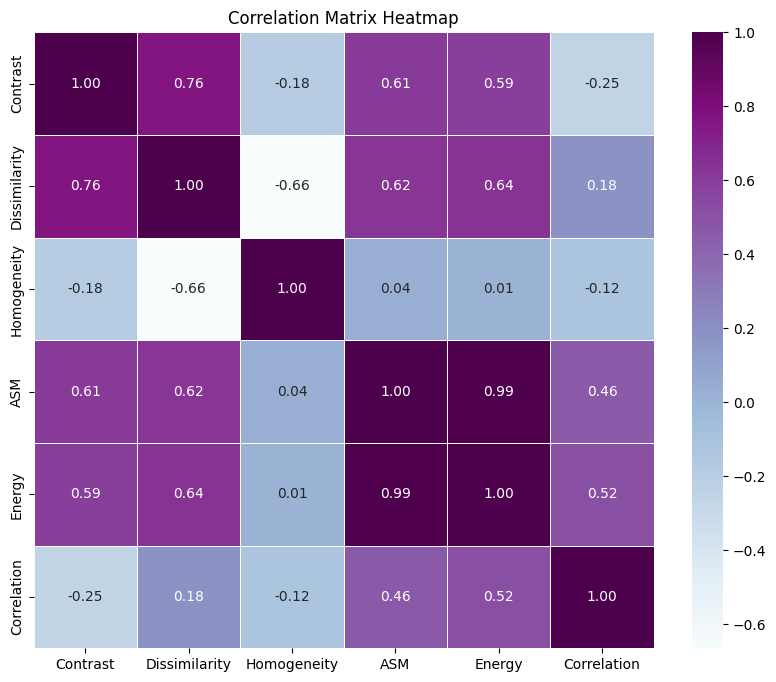

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X = dataset_glcm_0.drop(['Class'], axis=1 )
corr_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
x = dataset_glcm_0.drop([ 'Class'], axis = 1)
y= dataset_glcm_0['Class']
x1 = dataset_glcm_45.drop([ 'Class'], axis = 1)
y1= dataset_glcm_45['Class']
x2 = dataset_glcm_90.drop([ 'Class'], axis = 1)
y2= dataset_glcm_90['Class']
x3 = dataset_glcm_135.drop([ 'Class'], axis = 1)
y3= dataset_glcm_135['Class']

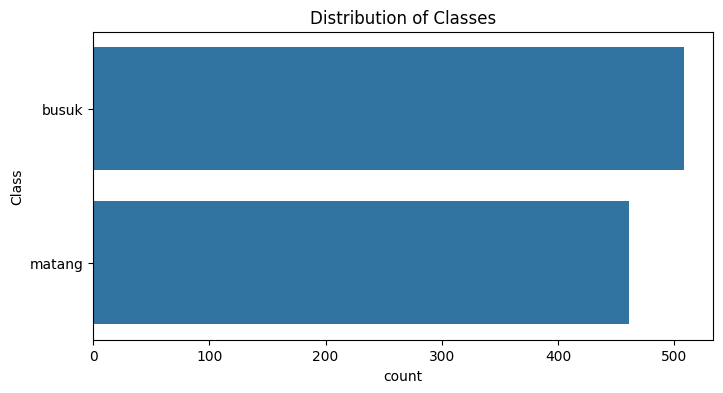

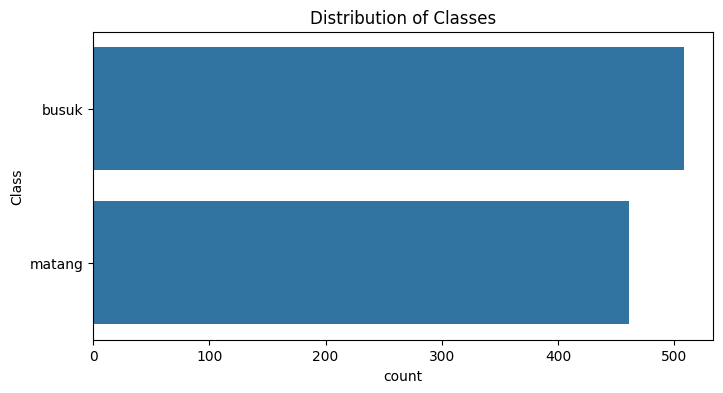

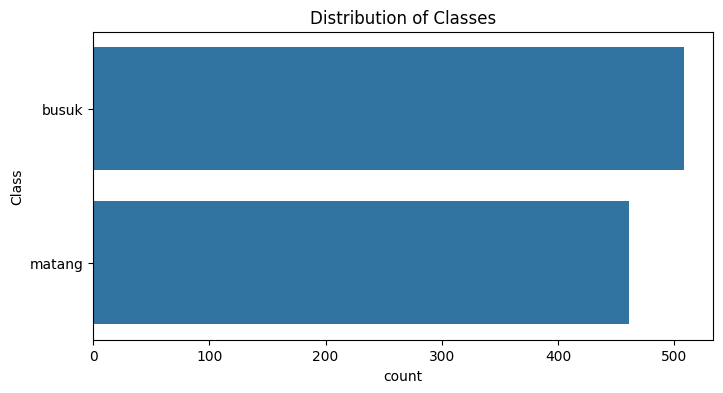

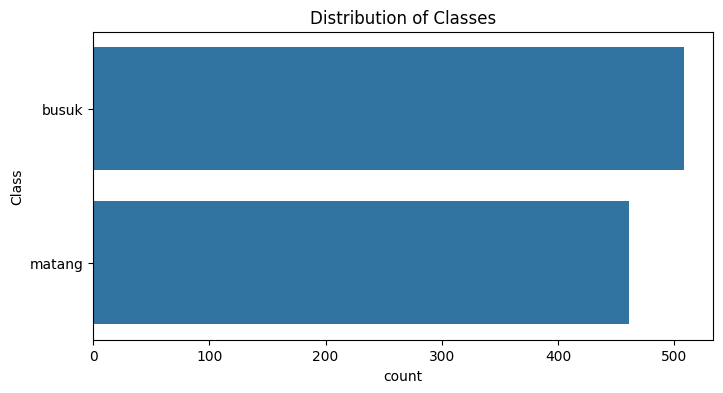

In [ ]:
class_datasets = [y, y1, y2, y3]
titles = ['0', '45', '90', '135']
for i, data in enumerate(class_datasets):
    plt.figure(figsize=(8, 4))
    sns.countplot(data)
    plt.title(f'Distribution of Classes')
    plt.show()


Shape after oversampling for angle 0: (1016, 6), (1016,)
Shape after oversampling for angle 45: (1016, 6), (1016,)
Shape after oversampling for angle 90: (1016, 6), (1016,)
Shape after oversampling for angle 135: (1016, 6), (1016,)


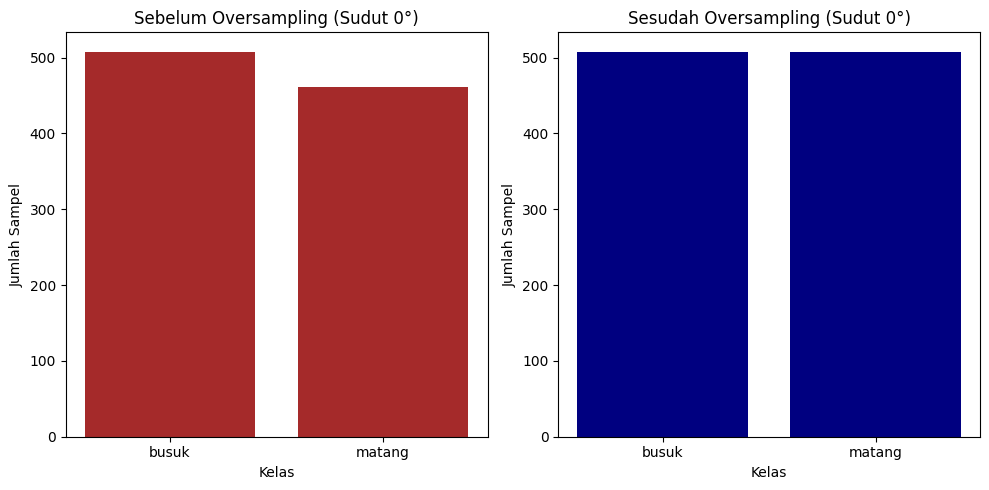

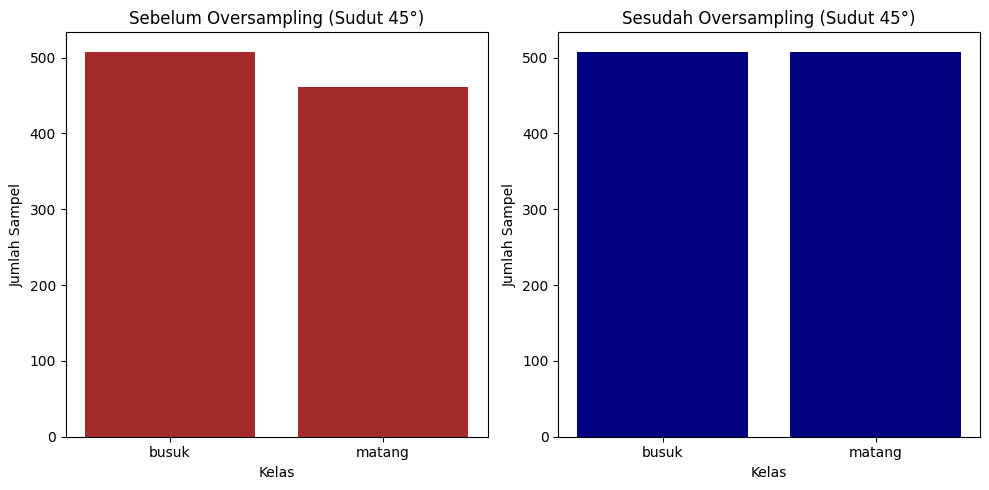

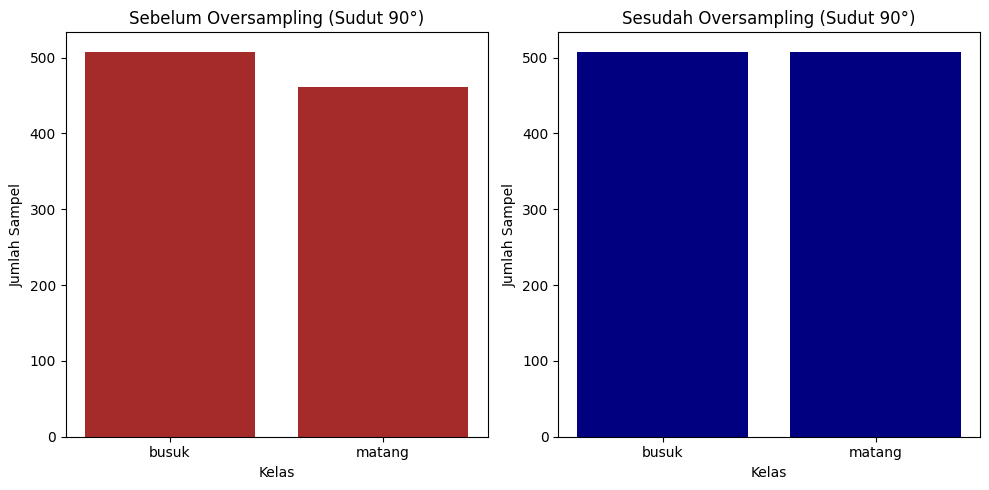

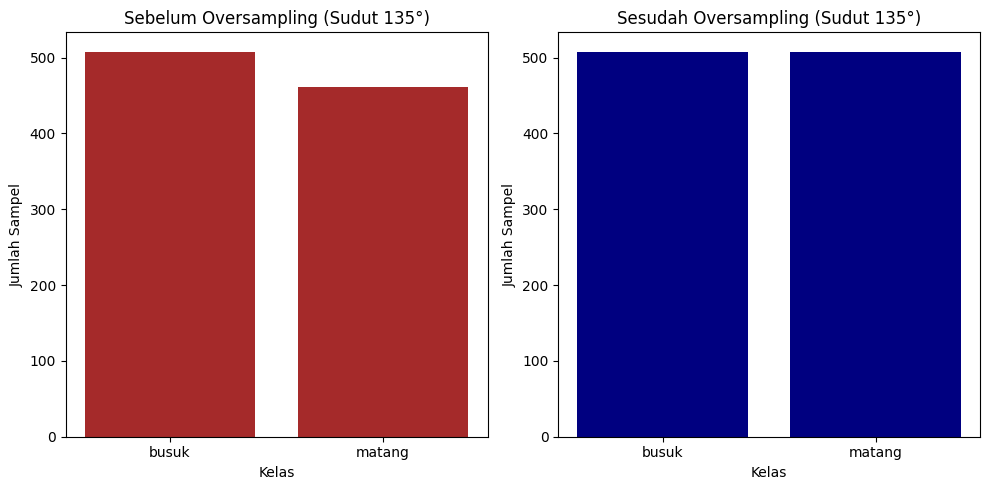

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi RandomOverSampler
ros = RandomOverSampler(random_state=0)

# Melakukan oversampling untuk sudut 0
x_sampling_0, y_sampling_0 = ros.fit_resample(x, y)
print(f'Shape after oversampling for angle 0: {x_sampling_0.shape}, {y_sampling_0.shape}')

# Melakukan oversampling untuk sudut 45
x_sampling_45, y_sampling_45 = ros.fit_resample(x1, y1)
print(f'Shape after oversampling for angle 45: {x_sampling_45.shape}, {y_sampling_45.shape}')

# Melakukan oversampling untuk sudut 90
x_sampling_90, y_sampling_90 = ros.fit_resample(x2, y2)
print(f'Shape after oversampling for angle 90: {x_sampling_90.shape}, {y_sampling_90.shape}')

# Melakukan oversampling untuk sudut 135
x_sampling_135, y_sampling_135 = ros.fit_resample(x3, y3)
print(f'Shape after oversampling for angle 135: {x_sampling_135.shape}, {y_sampling_135.shape}')

# Fungsi untuk plot jumlah sampel sebelum dan sesudah oversampling
def plot_class_counts(y_before, y_after, angle):
    class_counts_before = y_before.value_counts()
    class_counts_after = pd.Series(y_after).value_counts()

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.bar(class_counts_before.index, class_counts_before.values, color='brown')
    plt.title(f'Sebelum Oversampling (Sudut {angle}°)')
    plt.xlabel('Kelas')
    plt.ylabel('Jumlah Sampel')

    plt.subplot(1, 2, 2)
    plt.bar(class_counts_after.index, class_counts_after.values, color='navy')
    plt.title(f'Sesudah Oversampling (Sudut {angle}°)')
    plt.xlabel('Kelas')
    plt.ylabel('Jumlah Sampel')

    plt.tight_layout()
    plt.show()

# Plot jumlah sampel sebelum dan sesudah oversampling untuk masing-masing sudut
plot_class_counts(y, y_sampling_0, 0)
plot_class_counts(y1, y_sampling_45, 45)
plot_class_counts(y2, y_sampling_90, 90)
plot_class_counts(y3, y_sampling_135, 135)


# **MODEL SETELAH DI OVERSAMPLING**

Average Accuracy (0 degree): 0.7273447309958466
Average Precision (0 degree): 0.652936950665167
Average Recall (0 degree): 0.9694573442387799
Average F1 Score (0 degree): 0.7792723750711086


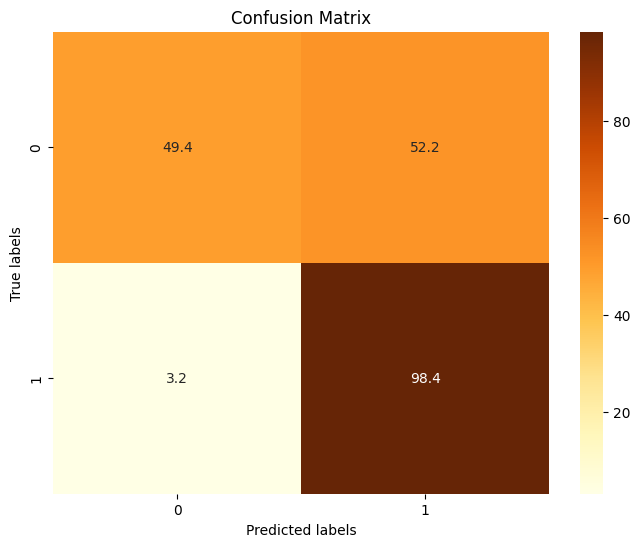

Average Accuracy (45 degrees): 0.7203950545735536
Average Precision (45 degrees): 0.6546405572739363
Average Recall (45 degrees): 0.9377818914799617
Average F1 Score (45 degrees): 0.7694027624120201


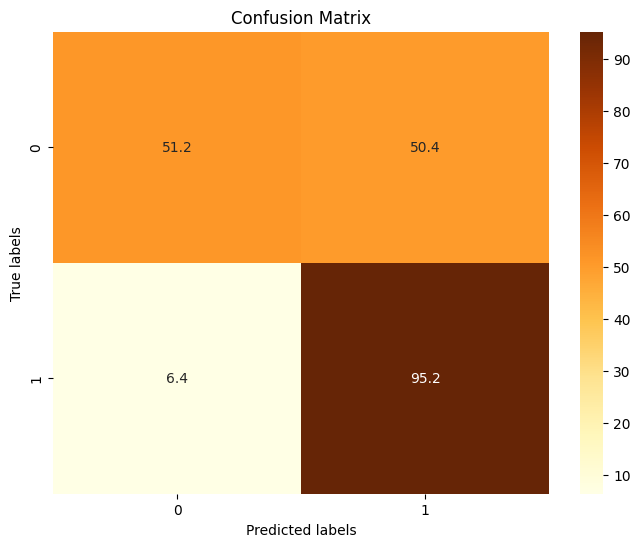

Average Accuracy (90 degrees): 0.8660822949869603
Average Precision (90 degrees): 0.8186490799310306
Average Recall (90 degrees): 0.9359202390722519
Average F1 Score (90 degrees): 0.8729966035334644


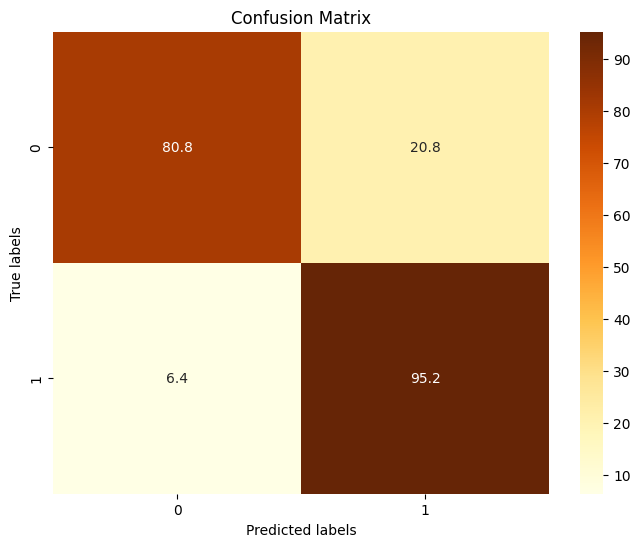

Average Accuracy (135 degrees): 0.9330580508065294
Average Precision (135 degrees): 0.9358449809310999
Average Recall (135 degrees): 0.9283980241164865
Average F1 Score (135 degrees): 0.9321026175556112


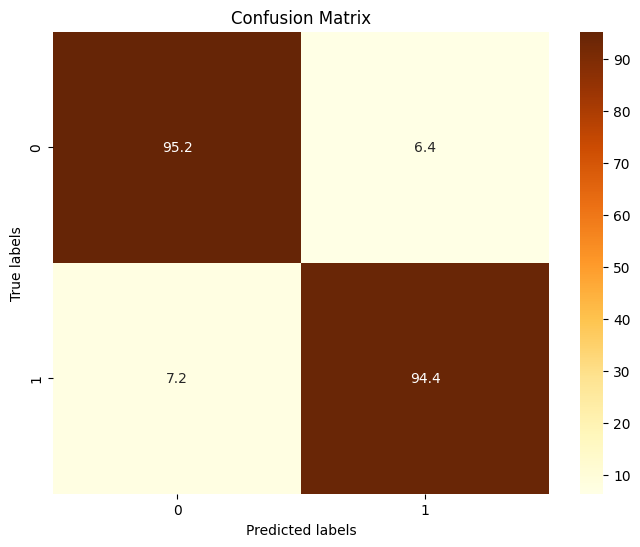

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk train model dan menghitung evaluasi metrics dengan k-fold cross-validation
def train_and_evaluate_with_cv(x_awal, y_awal, angle, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    confusion_matrices = []

    label_encoder = LabelEncoder()
    y_awal_encoded = label_encoder.fit_transform(y_awal)

    for train_index, test_index in kf.split(x_awal):
        x_train, x_test = x_awal[train_index], x_awal[test_index]
        y_train, y_test = y_awal_encoded[train_index], y_awal_encoded[test_index]

        svm = SVC()
        svm.fit(x_train, y_train)

        y_pred = svm.predict(x_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        precision = precision_score(y_test, y_pred)
        precisions.append(precision)

        recall = recall_score(y_test, y_pred)
        recalls.append(recall)

        f1 = f1_score(y_test, y_pred)
        f1_scores.append(f1)

        confusion = confusion_matrix(y_test, y_pred)
        confusion_matrices.append(confusion)

    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1_score = sum(f1_scores) / len(f1_scores)
    avg_confusion_matrix = sum(confusion_matrices) / len(confusion_matrices)

    return avg_accuracy, avg_precision, avg_recall, avg_f1_score, avg_confusion_matrix

# Fungsi untuk mencetak matriks kebingungan sebagai gambar dengan warna merah
def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, cmap='YlOrBr', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Contoh data dan evaluasi
x_sampling_0 = np.array(x_sampling_0)
y_sampling_0 = np.array(y_sampling_0)
x_sampling_45 = np.array(x_sampling_45)
y_sampling_45 = np.array(y_sampling_45)
x_sampling_90 = np.array(x_sampling_90)
y_sampling_90 = np.array(y_sampling_90)
x_sampling_135 = np.array(x_sampling_135)
y_sampling_135 = np.array(y_sampling_135)

avg_accuracy_0, avg_precision_0, avg_recall_0, avg_f1_score_0, avg_confusion_matrix_0 = train_and_evaluate_with_cv(x_sampling_0, y_sampling_0, 0)
avg_accuracy_45, avg_precision_45, avg_recall_45, avg_f1_score_45, avg_confusion_matrix_45 = train_and_evaluate_with_cv(x_sampling_45, y_sampling_45, 45)
avg_accuracy_90, avg_precision_90, avg_recall_90, avg_f1_score_90, avg_confusion_matrix_90 = train_and_evaluate_with_cv(x_sampling_90, y_sampling_90, 90)
avg_accuracy_135, avg_precision_135, avg_recall_135, avg_f1_score_135, avg_confusion_matrix_135 = train_and_evaluate_with_cv(x_sampling_135, y_sampling_135, 135)

# Menampilkan hasil evaluasi
print("Average Accuracy (0 degree):", avg_accuracy_0)
print("Average Precision (0 degree):", avg_precision_0)
print("Average Recall (0 degree):", avg_recall_0)
print("Average F1 Score (0 degree):", avg_f1_score_0)
plot_confusion_matrix(avg_confusion_matrix_0)

print("Average Accuracy (45 degrees):", avg_accuracy_45)
print("Average Precision (45 degrees):", avg_precision_45)
print("Average Recall (45 degrees):", avg_recall_45)
print("Average F1 Score (45 degrees):", avg_f1_score_45)
plot_confusion_matrix(avg_confusion_matrix_45)

print("Average Accuracy (90 degrees):", avg_accuracy_90)
print("Average Precision (90 degrees):", avg_precision_90)
print("Average Recall (90 degrees):", avg_recall_90)
print("Average F1 Score (90 degrees):", avg_f1_score_90)
plot_confusion_matrix(avg_confusion_matrix_90)

print("Average Accuracy (135 degrees):", avg_accuracy_135)
print("Average Precision (135 degrees):", avg_precision_135)
print("Average Recall (135 degrees):", avg_recall_135)
print("Average F1 Score (135 degrees):", avg_f1_score_135)
plot_confusion_matrix(avg_confusion_matrix_135)


# **MODEL AWAL**

Average Accuracy (0 degree): 0.7131563484856579
Average Precision (0 degree): 0.6366885888393424
Average Recall (0 degree): 0.9242429886082529
Average F1 Score (0 degree): 0.7536101070307625


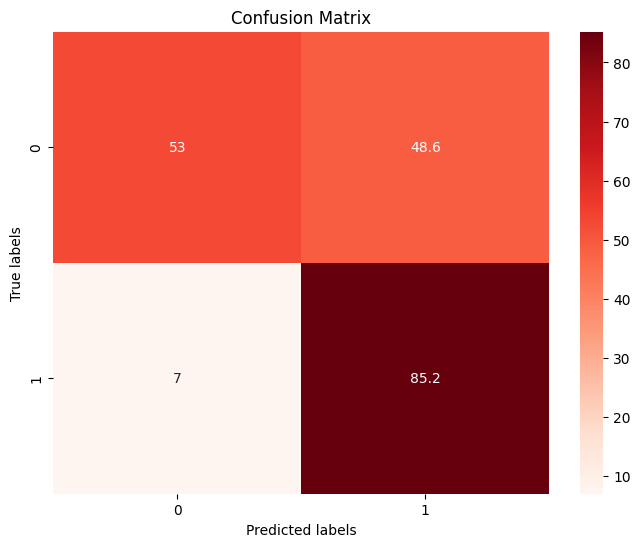

Average Accuracy (45 degrees): 0.7100208322205012
Average Precision (45 degrees): 0.6350132156034729
Average Recall (45 degrees): 0.9201315631186994
Average F1 Score (45 degrees): 0.7510797665160224


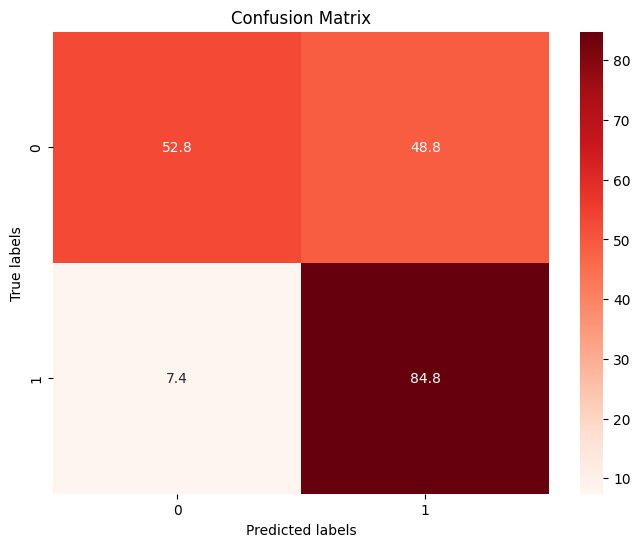

Average Accuracy (90 degrees): 0.8678916724533947
Average Precision (90 degrees): 0.8144647206968288
Average Recall (90 degrees): 0.9351008820303314
Average F1 Score (90 degrees): 0.8704562182370467


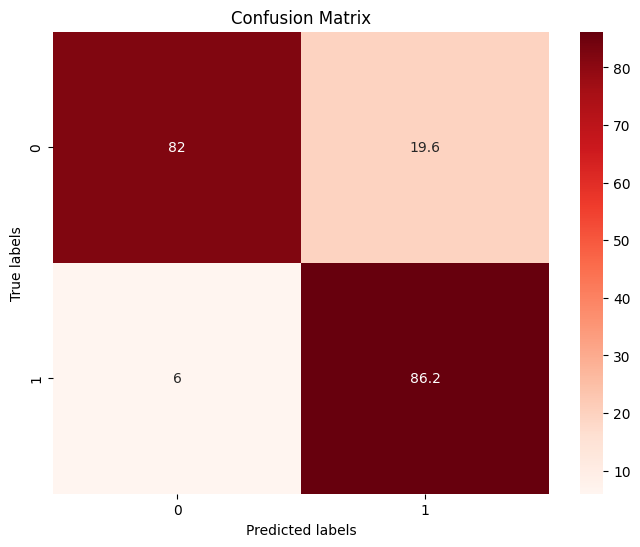

Average Accuracy (135 degrees): 0.9349767640617488
Average Precision (135 degrees): 0.9369365668067579
Average Recall (135 degrees): 0.9263417285719335
Average F1 Score (135 degrees): 0.9312558297646938


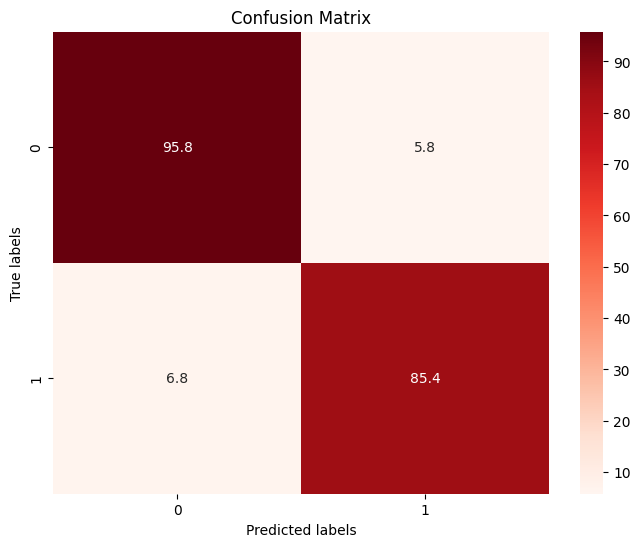

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk train model dan menghitung evaluasi metrics dengan k-fold cross-validation
def train_and_evaluate_with_cv(x_awal, y_awal, angle, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    confusion_matrices = []

    label_encoder = LabelEncoder()
    y_awal_encoded = label_encoder.fit_transform(y_awal)

    for train_index, test_index in kf.split(x_awal):
        x_train, x_test = x_awal[train_index], x_awal[test_index]
        y_train, y_test = y_awal_encoded[train_index], y_awal_encoded[test_index]

        svm = SVC()
        svm.fit(x_train, y_train)

        y_pred = svm.predict(x_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        precision = precision_score(y_test, y_pred)
        precisions.append(precision)

        recall = recall_score(y_test, y_pred)
        recalls.append(recall)

        f1 = f1_score(y_test, y_pred)
        f1_scores.append(f1)

        confusion = confusion_matrix(y_test, y_pred)
        confusion_matrices.append(confusion)

    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1_score = sum(f1_scores) / len(f1_scores)
    avg_confusion_matrix = sum(confusion_matrices) / len(confusion_matrices)

    return avg_accuracy, avg_precision, avg_recall, avg_f1_score, avg_confusion_matrix

# Fungsi untuk mencetak matriks kebingungan sebagai gambar dengan warna merah
def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, cmap='Reds', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Contoh data dan evaluasi
x = np.array(x)
y = np.array(y)
x1 = np.array(x1)
y1 = np.array(y1)
x2 = np.array(x2)
y2 = np.array(y2)
x3 = np.array(x3)
y3 = np.array(y3)

avg_accuracy_0, avg_precision_0, avg_recall_0, avg_f1_score_0, avg_confusion_matrix_0 = train_and_evaluate_with_cv(x, y, 0)
avg_accuracy_45, avg_precision_45, avg_recall_45, avg_f1_score_45, avg_confusion_matrix_45 = train_and_evaluate_with_cv(x1, y1, 45)
avg_accuracy_90, avg_precision_90, avg_recall_90, avg_f1_score_90, avg_confusion_matrix_90 = train_and_evaluate_with_cv(x2, y2, 90)
avg_accuracy_135, avg_precision_135, avg_recall_135, avg_f1_score_135, avg_confusion_matrix_135 = train_and_evaluate_with_cv(x3, y3, 135)

# Menampilkan hasil evaluasi
print("Average Accuracy (0 degree):", avg_accuracy_0)
print("Average Precision (0 degree):", avg_precision_0)
print("Average Recall (0 degree):", avg_recall_0)
print("Average F1 Score (0 degree):", avg_f1_score_0)
plot_confusion_matrix(avg_confusion_matrix_0)

print("Average Accuracy (45 degrees):", avg_accuracy_45)
print("Average Precision (45 degrees):", avg_precision_45)
print("Average Recall (45 degrees):", avg_recall_45)
print("Average F1 Score (45 degrees):", avg_f1_score_45)
plot_confusion_matrix(avg_confusion_matrix_45)

print("Average Accuracy (90 degrees):", avg_accuracy_90)
print("Average Precision (90 degrees):", avg_precision_90)
print("Average Recall (90 degrees):", avg_recall_90)
print("Average F1 Score (90 degrees):", avg_f1_score_90)
plot_confusion_matrix(avg_confusion_matrix_90)

print("Average Accuracy (135 degrees):", avg_accuracy_135)
print("Average Precision (135 degrees):", avg_precision_135)
print("Average Recall (135 degrees):", avg_recall_135)
print("Average F1 Score (135 degrees):", avg_f1_score_135)
plot_confusion_matrix(avg_confusion_matrix_135)


# **TUNNING HYPERPARAMS DAN MODEL AKHIR**

#KERNEL LINEAR

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Asumsi bahwa x_sampling_* dan y_sampling_* sudah tersedia
x_sampling_0 = np.array(x_sampling_0)
y_sampling_0 = np.array(y_sampling_0)
x_sampling_45 = np.array(x_sampling_45)
y_sampling_45 = np.array(y_sampling_45)
x_sampling_90 = np.array(x_sampling_90)
y_sampling_90 = np.array(y_sampling_90)
x_sampling_135 = np.array(x_sampling_135)
y_sampling_135 = np.array(y_sampling_135)

# Hyperparameter yang akan diuji
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear'],
}

# Fungsi untuk training dan evaluasi model dengan k-fold cross-validation
def train_and_evaluate_with_cv(x, y):
    # Mengonversi label menjadi angka
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Inisialisasi model SVM
    svm_model = svm.SVC()

    # K-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=0)

    # Grid search untuk hyperparameter tuning
    svm_grid = GridSearchCV(estimator=svm_model, param_grid=parameters, cv=kf, verbose=2, n_jobs=-1)
    svm_grid.fit(x, y_encoded)

    # Output hasil tuning
    best_params = svm_grid.best_params_
    print("Hyperparameter Terbaik:", best_params)

    # Evaluasi model terbaik pada keseluruhan data dengan k-fold cross-validation
    best_svm = svm_grid.best_estimator_
    accuracies = cross_val_score(best_svm, x, y_encoded, cv=kf)

    return accuracies.mean(), best_svm, le

# Data untuk setiap sudut
datasets = {
    '0': (x_sampling_0, y_sampling_0),
    '45': (x_sampling_45, y_sampling_45),
    '90': (x_sampling_90, y_sampling_90),
    '135': (x_sampling_135, y_sampling_135),
}


# Memanggil fungsi train_and_evaluate_with_cv untuk setiap sudut
for angle, (x, y) in datasets.items():
    print(f"Evaluasi Sudut {angle}:")
    avg_accuracy, best_model, le = train_and_evaluate_with_cv(x, y)
    print(f"Rata-rata Akurasi Sudut {angle}: {avg_accuracy}")



Evaluasi Sudut 0:
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Hyperparameter Terbaik: {'C': 100, 'kernel': 'linear'}
Rata-rata Akurasi Sudut 0: 0.9990147783251231
Evaluasi Sudut 45:
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Hyperparameter Terbaik: {'C': 100, 'kernel': 'linear'}
Rata-rata Akurasi Sudut 45: 0.9980295566502463
Evaluasi Sudut 90:
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Hyperparameter Terbaik: {'C': 1000, 'kernel': 'linear'}
Rata-rata Akurasi Sudut 90: 0.9980295566502463
Evaluasi Sudut 135:
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Hyperparameter Terbaik: {'C': 100, 'kernel': 'linear'}
Rata-rata Akurasi Sudut 135: 0.9980295566502463


# KERNEL RBF

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Asumsi bahwa x_sampling_* dan y_sampling_* sudah tersedia
x_sampling_0 = np.array(x_sampling_0)
y_sampling_0 = np.array(y_sampling_0)
x_sampling_45 = np.array(x_sampling_45)
y_sampling_45 = np.array(y_sampling_45)
x_sampling_90 = np.array(x_sampling_90)
y_sampling_90 = np.array(y_sampling_90)
x_sampling_135 = np.array(x_sampling_135)
y_sampling_135 = np.array(y_sampling_135)

# Hyperparameter yang akan diuji
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel' : ['rbf']
}

# Fungsi untuk training dan evaluasi model dengan k-fold cross-validation
def train_and_evaluate_with_cv(x, y):
    # Mengonversi label menjadi angka
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Inisialisasi model SVM
    svm_model = svm.SVC()

    # K-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=0)

    # Grid search untuk hyperparameter tuning
    svm_grid = GridSearchCV(estimator=svm_model, param_grid=parameters, cv=kf, verbose=2, n_jobs=-1)
    svm_grid.fit(x, y_encoded)

    # Output hasil tuning
    best_params = svm_grid.best_params_
    print("Hyperparameter Terbaik:", best_params)

    # Evaluasi model terbaik pada keseluruhan data dengan k-fold cross-validation
    best_svm = svm_grid.best_estimator_
    accuracies = cross_val_score(best_svm, x, y_encoded, cv=kf)

    return accuracies.mean(), best_svm, le

# Data untuk setiap sudut
datasets = {
    '0': (x_sampling_0, y_sampling_0),
    '45': (x_sampling_45, y_sampling_45),
    '90': (x_sampling_90, y_sampling_90),
    '135': (x_sampling_135, y_sampling_135),
}

# Memanggil fungsi train_and_evaluate_with_cv untuk setiap sudut
for angle, (x, y) in datasets.items():
    print(f"Evaluasi Sudut {angle}:")
    avg_accuracy, best_model, le = train_and_evaluate_with_cv(x, y)
    print(f"Rata-rata Akurasi Sudut {angle}: {avg_accuracy}")


Evaluasi Sudut 0:
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Hyperparameter Terbaik: {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
Rata-rata Akurasi Sudut 0: 0.9960639428185066
Evaluasi Sudut 45:
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Hyperparameter Terbaik: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Rata-rata Akurasi Sudut 45: 0.9950835506616439
Evaluasi Sudut 90:
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Hyperparameter Terbaik: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Rata-rata Akurasi Sudut 90: 0.9980295566502463
Evaluasi Sudut 135:
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Hyperparameter Terbaik: {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
Rata-rata Akurasi Sudut 135: 0.9704723268617792


# KERNEL POLY

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Asumsi bahwa x_sampling_* dan y_sampling_* sudah tersedia
x_sampling_0 = np.array(x_sampling_0)
y_sampling_0 = np.array(y_sampling_0)
x_sampling_45 = np.array(x_sampling_45)
y_sampling_45 = np.array(y_sampling_45)
x_sampling_90 = np.array(x_sampling_90)
y_sampling_90 = np.array(y_sampling_90)
x_sampling_135 = np.array(x_sampling_135)
y_sampling_135 = np.array(y_sampling_135)

# Hyperparameter yang akan diuji
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'degree': [2, 3, 4, 5],
    'kernel' : ['poly'],
}

# Fungsi untuk training dan evaluasi model dengan k-fold cross-validation
def train_and_evaluate_with_cv(x, y):
    # Mengonversi label menjadi angka
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Inisialisasi model SVM
    svm_model = svm.SVC()

    # K-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=0)

    # Grid search untuk hyperparameter tuning
    svm_grid = GridSearchCV(estimator=svm_model, param_grid=parameters, cv=kf, verbose=2, n_jobs=-1)
    svm_grid.fit(x, y_encoded)

    # Output hasil tuning
    best_params = svm_grid.best_params_
    print("Hyperparameter Terbaik:", best_params)

    # Evaluasi model terbaik pada keseluruhan data dengan k-fold cross-validation
    best_svm = svm_grid.best_estimator_
    accuracies = cross_val_score(best_svm, x, y_encoded, cv=kf)

    return accuracies.mean(), best_svm, le

# Data untuk setiap sudut
datasets = {
    '0': (x_sampling_0, y_sampling_0),
    '45': (x_sampling_45, y_sampling_45),
    '90': (x_sampling_90, y_sampling_90),
    '135': (x_sampling_135, y_sampling_135),
}

# Memanggil fungsi train_and_evaluate_with_cv untuk setiap sudut
for angle, (x, y) in datasets.items():
    print(f"Evaluasi Sudut {angle}:")
    avg_accuracy, best_model, le = train_and_evaluate_with_cv(x, y)
    print(f"Rata-rata Akurasi Sudut {angle}: {avg_accuracy}")



Evaluasi Sudut 0:
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Hyperparameter Terbaik: {'C': 1000, 'degree': 5, 'kernel': 'poly'}
Rata-rata Akurasi Sudut 0: 0.8415048778131944
Evaluasi Sudut 45:
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Hyperparameter Terbaik: {'C': 1000, 'degree': 5, 'kernel': 'poly'}
Rata-rata Akurasi Sudut 45: 0.8749734376509226
Evaluasi Sudut 90:
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Hyperparameter Terbaik: {'C': 1000, 'degree': 5, 'kernel': 'poly'}
Rata-rata Akurasi Sudut 90: 0.9359992272771176
Evaluasi Sudut 135:
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Hyperparameter Terbaik: {'C': 1000, 'degree': 5, 'kernel': 'poly'}
Rata-rata Akurasi Sudut 135: 0.9438810006761326


# MODEL SUDUT 0

Average Accuracy: 0.9990147783251231
Average Precision: 0.9990099009900991
Average Recall: 0.9990291262135923
Average F1 Score: 0.9990146826841404


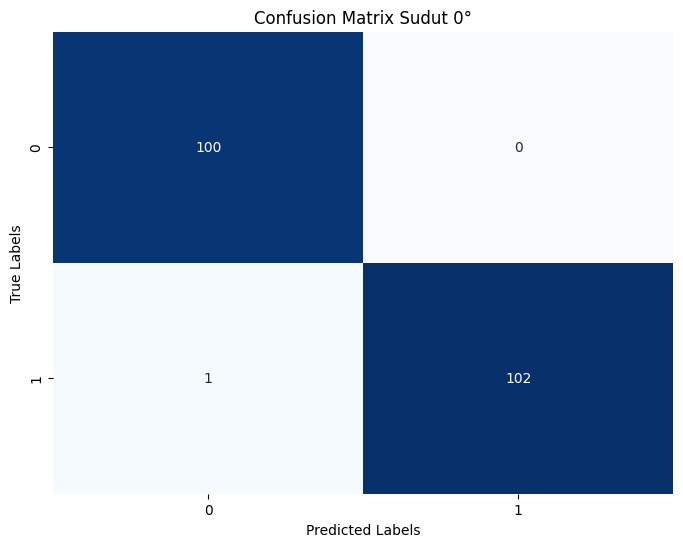

              precision    recall  f1-score   support

       busuk       0.99      1.00      1.00       100
      matang       1.00      0.99      1.00       103

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg       1.00      1.00      1.00       203



In [ ]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Menggunakan KFold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)
x_sampling = np.array(x_sampling_0)
y_sampling = np.array(y_sampling_0)

accuracies = []
precisions = []
recalls = []
f1_scores = []
confusion_matrices = []
# Masukan hyperparameter terbaik
best_modelSVM_0 = SVC(C=100, kernel='linear')

for train_index, test_index in kf.split(x_sampling):
    x_train, x_test = x_sampling[train_index], x_sampling[test_index]
    y_train, y_test = y_sampling[train_index], y_sampling[test_index]

    best_modelSVM_0.fit(x_train, y_train)
    y_pred = best_modelSVM_0.predict(x_test)

    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='macro'))
    recalls.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

# Rata-rata metrik evaluasi
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1_score = np.mean(f1_scores)

# Menampilkan hasil rata-rata
print(f'Average Accuracy: {mean_accuracy}')
print(f'Average Precision: {mean_precision}')
print(f'Average Recall: {mean_recall}')
print(f'Average F1 Score: {mean_f1_score}')

# Membuat confusion matrix dari fold terakhir
cm = confusion_matrices[-1]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Sudut 0°')
plt.show()

# Laporan klasifikasi dari fold terakhir
report = classification_report(y_test, y_pred)
print(report)


In [ ]:
import pickle

with open('model_sudut_0.pkl', 'wb') as f:
    pickle.dump(best_modelSVM_0, f)

#MODEL SUDUT 45

Average Accuracy: 0.9980295566502463
Average Precision: 0.9980392156862745
Average Recall: 0.9980582524271846
Average F1 Score: 0.9980295088332362


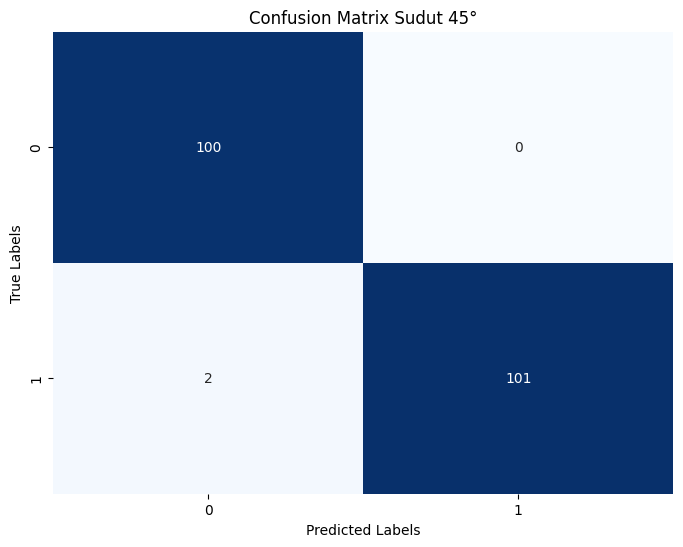

              precision    recall  f1-score   support

       busuk       0.98      1.00      0.99       100
      matang       1.00      0.98      0.99       103

    accuracy                           0.99       203
   macro avg       0.99      0.99      0.99       203
weighted avg       0.99      0.99      0.99       203



In [ ]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Menggunakan KFold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)
x_sampling = np.array(x_sampling_45)
y_sampling = np.array(y_sampling_45)

accuracies = []
precisions = []
recalls = []
f1_scores = []
confusion_matrices = []

# Masukan hyperparameter terbaik
best_modelSVM_45 = SVC(C=100, kernel='linear')

for train_index, test_index in kf.split(x_sampling):
    x_train, x_test = x_sampling[train_index], x_sampling[test_index]
    y_train, y_test = y_sampling[train_index], y_sampling[test_index]

    best_modelSVM_45.fit(x_train, y_train)
    y_pred = best_modelSVM_45.predict(x_test)

    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='macro'))
    recalls.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

# Rata-rata metrik evaluasi
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1_score = np.mean(f1_scores)

# Menampilkan hasil rata-rata
print(f'Average Accuracy: {mean_accuracy}')
print(f'Average Precision: {mean_precision}')
print(f'Average Recall: {mean_recall}')
print(f'Average F1 Score: {mean_f1_score}')

# Membuat confusion matrix dari fold terakhir
cm = confusion_matrices[-1]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Sudut 45°')
plt.show()

# Laporan klasifikasi dari fold terakhir
report = classification_report(y_test, y_pred)
print(report)


In [ ]:
import pickle

with open('model_sudut_45.pkl', 'wb') as f:
    pickle.dump(best_modelSVM_45, f)

#MODEL SUDUT 90

Average Accuracy: 0.9980295566502463
Average Precision: 0.9980392156862745
Average Recall: 0.9980582524271846
Average F1 Score: 0.9980295088332362


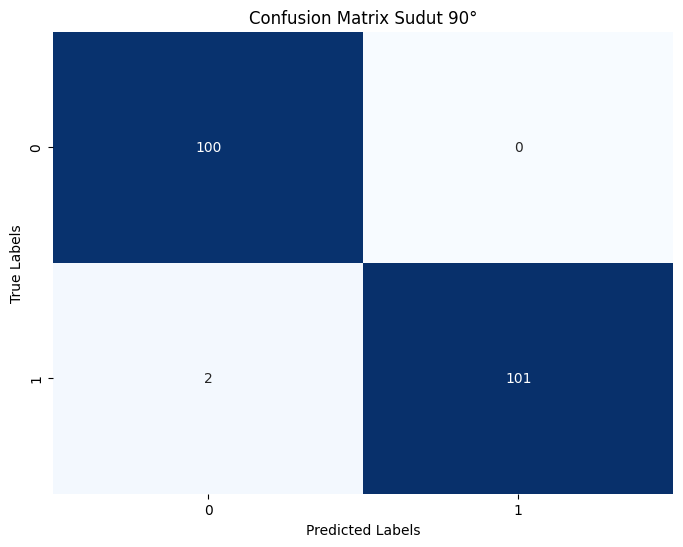

              precision    recall  f1-score   support

       busuk       0.98      1.00      0.99       100
      matang       1.00      0.98      0.99       103

    accuracy                           0.99       203
   macro avg       0.99      0.99      0.99       203
weighted avg       0.99      0.99      0.99       203



In [ ]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Menggunakan KFold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)
x_sampling = np.array(x_sampling_90)
y_sampling = np.array(y_sampling_90)

accuracies = []
precisions = []
recalls = []
f1_scores = []
confusion_matrices = []

# Masukan hyperparameter terbaik
best_modelSVM_90 = SVC(C=1000, kernel='rbf', gamma=0.01)

for train_index, test_index in kf.split(x_sampling):
    x_train, x_test = x_sampling[train_index], x_sampling[test_index]
    y_train, y_test = y_sampling[train_index], y_sampling[test_index]

    best_modelSVM_90.fit(x_train, y_train)
    y_pred = best_modelSVM_90.predict(x_test)

    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='macro'))
    recalls.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

# Rata-rata metrik evaluasi
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1_score = np.mean(f1_scores)

# Menampilkan hasil rata-rata
print(f'Average Accuracy: {mean_accuracy}')
print(f'Average Precision: {mean_precision}')
print(f'Average Recall: {mean_recall}')
print(f'Average F1 Score: {mean_f1_score}')

# Membuat confusion matrix dari fold terakhir
cm = confusion_matrices[-1]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Sudut 90°')
plt.show()

# Laporan klasifikasi dari fold terakhir
report = classification_report(y_test, y_pred)
print(report)


In [ ]:
import pickle

with open('model_sudut_90.pkl', 'wb') as f:
    pickle.dump(best_modelSVM_90, f)

#MODEL SUDUT 135

Average Accuracy: 0.9980295566502463
Average Precision: 0.9980392156862745
Average Recall: 0.9980582524271846
Average F1 Score: 0.9980295088332362


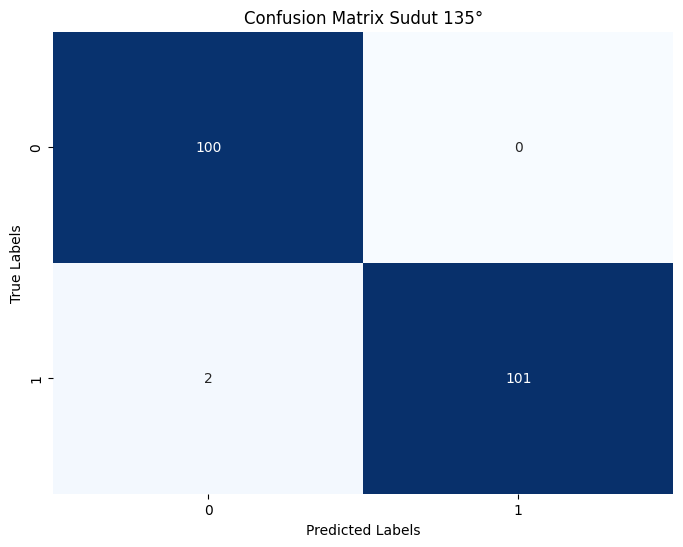

              precision    recall  f1-score   support

       busuk       0.98      1.00      0.99       100
      matang       1.00      0.98      0.99       103

    accuracy                           0.99       203
   macro avg       0.99      0.99      0.99       203
weighted avg       0.99      0.99      0.99       203



In [ ]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Menggunakan KFold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)
x_sampling = np.array(x_sampling_135)
y_sampling = np.array(y_sampling_135)

accuracies = []
precisions = []
recalls = []
f1_scores = []
confusion_matrices = []

# Masukan hyperparameter terbaik
best_modelSVM_135 = SVC(C=100, kernel='linear')

for train_index, test_index in kf.split(x_sampling):
    x_train, x_test = x_sampling[train_index], x_sampling[test_index]
    y_train, y_test = y_sampling[train_index], y_sampling[test_index]

    best_modelSVM_135.fit(x_train, y_train)
    y_pred = best_modelSVM_135.predict(x_test)

    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='macro'))
    recalls.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

# Rata-rata metrik evaluasi
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1_score = np.mean(f1_scores)

# Menampilkan hasil rata-rata
print(f'Average Accuracy: {mean_accuracy}')
print(f'Average Precision: {mean_precision}')
print(f'Average Recall: {mean_recall}')
print(f'Average F1 Score: {mean_f1_score}')

# Membuat confusion matrix dari fold terakhir
cm = confusion_matrices[-1]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Sudut 135°')
plt.show()

# Laporan klasifikasi dari fold terakhir
report = classification_report(y_test, y_pred)
print(report)


In [ ]:
import pickle

with open('model_sudut_135.pkl', 'wb') as f:
    pickle.dump(best_modelSVM_135, f)

# **TEST GAMBAR**

GLCM untuk sudut 0 adalah: [159.98871017156867, 2.668458946078432, 0.623825536985144, 0.05915587135206414, 0.2432198004934305, 0.9827444421790221]
GLCM untuk sudut 0.7853981633974483 adalah: [239.560492118416, 3.9012533640907345, 0.5339137425831084, 0.0567518027624013, 0.23822636873864594, 0.9740710743505286]
GLCM untuk sudut 1.5707963267948966 adalah: [127.14224877450981, 2.5737132352941177, 0.6060195456709141, 0.0588693924859504, 0.24263015576376815, 0.9862815107719969]
GLCM untuk sudut 2.356194490192345 adalah: [228.6594232987313, 3.4827681660899654, 0.5716926823427839, 0.056838838520836286, 0.23840897323892044, 0.9752509558928727]
Skor = -4
Hasil prediksi untuk sudut sudut_0: busuk
Hasil prediksi untuk sudut sudut_45: busuk
Hasil prediksi untuk sudut sudut_90: busuk
Hasil prediksi untuk sudut sudut_135: busuk
Hasil prediksi akhir: busuk
DataFrame untuk sudut 0:
    Contrast  Dissimilarity  Homogeneity       ASM   Energy  Correlation
0  159.98871       2.668459     0.623826  0.05915

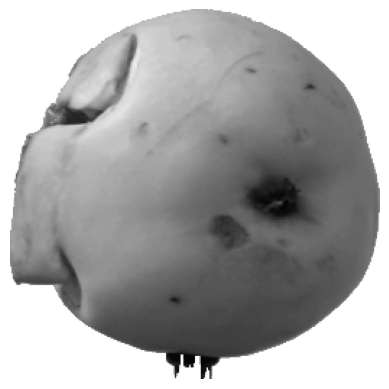

In [ ]:
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# Mengimpor model yang telah disimpan
best_modelSVM_0 = joblib.load("model_sudut_0.pkl")
best_modelSVM_45 = joblib.load("model_sudut_45.pkl")
best_modelSVM_90 = joblib.load("model_sudut_90.pkl")
best_modelSVM_135 = joblib.load("model_sudut_135.pkl")

columns = ['Contrast', 'Dissimilarity', 'Homogeneity', 'ASM', 'Energy', 'Correlation']
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

# Fungsi untuk melakukan cropping, mengubah ke grayscale, dan ekstraksi fitur GLCM
def preprocess_image(image_path):
    # Baca gambar
    image = cv2.imread(image_path)

    # Resize dan ubah gambar menjadi grayscale
    img = cv2.resize(image, (256, 256))
    grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    simpan = [grayscale_img]  # Menyimpan gambar yang telah diproses

    # Ekstrak fitur GLCM dari setiap sudut
    glcm_features = {}
    for angle in angles:
        glcm = graycomatrix(grayscale_img, [1], [angle], symmetric=True, normed=True)
        contrast = graycoprops(glcm, 'contrast')[0, 0]
        dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
        homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
        asm = graycoprops(glcm, 'ASM')[0, 0]
        energy = graycoprops(glcm, 'energy')[0, 0]
        correlation = graycoprops(glcm, 'correlation')[0, 0]

        glcm_features[angle] = [contrast, dissimilarity, homogeneity, asm, energy, correlation]
        print(f"GLCM untuk sudut {angle} adalah: {glcm_features[angle]}")

    return glcm_features, simpan

# Path ke gambar uji
gambar_uji = "/content/r0_30.jpg"

# Preprocess gambar uji dan ekstraksi fitur GLCM
fitur_glcm, simpan = preprocess_image(gambar_uji)

# Lakukan prediksi menggunakan model yang sesuai untuk setiap sudut
score = 0
predictions = {}
for angle in angles:
    fitur = np.array([fitur_glcm[angle]])
    if angle == 0:
        prediction = best_modelSVM_0.predict(fitur)
        predictions['sudut_0'] = prediction[0]
        if prediction == 'matang':
            score += 1
        elif prediction == 'busuk':
            score -= 1
    elif angle == np.pi/4:
        prediction = best_modelSVM_45.predict(fitur)
        predictions['sudut_45'] = prediction[0]
        if prediction == 'matang':
            score += 1
        elif prediction == 'busuk':
            score -= 1
    elif angle == np.pi/2:
        prediction = best_modelSVM_90.predict(fitur)
        predictions['sudut_90'] = prediction[0]
        if prediction == 'matang':
            score += 1
        elif prediction == 'busuk':
            score -= 1
    elif angle == 3*np.pi/4:
        prediction = best_modelSVM_135.predict(fitur)
        predictions['sudut_135'] = prediction[0]
        if prediction == 'matang':
            score += 1
        elif prediction == 'busuk':
            score -= 1

if score > 0:
    final_prediction = "matang"
elif score < 0:
    final_prediction = "busuk"
else:
    final_prediction = "ambigu"

print("Skor =", score)
# Menampilkan hasil prediksi
for angle, pred in predictions.items():
    print(f"Hasil prediksi untuk sudut {angle}: {pred}")

print("Hasil prediksi akhir:", final_prediction)

# Menyusun DataFrame untuk fitur GLCM per sudut
dataframes = {}
for angle in angles:
    df = pd.DataFrame([fitur_glcm[angle]], columns=columns)
    dataframes[angle] = df

for angle, df in dataframes.items():
    print(f"DataFrame untuk sudut {angle}:\n{df}\n")

# Menampilkan gambar yang diproses
plt.figure()
plt.imshow(simpan[0], cmap='gray')
plt.axis('off')
plt.show()
